
# CLUSTERING Procurement Contract DATA with KMeans - Karen Belita notebook modifications
         
Clustering is a type of **Unsupervised Machine Learning**, which can determine relationships of unlabeled data.  
This notebook will show how to get and prepare data for exploration of clustering methods.  
This notebook will use scikit-learn for machine learning processes.

### Data information
Test K Means over detail and summarized government IT contracts 

### Dependencies

In [1]:
import pandas as pd
import csv
import os 
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix
from __future__ import print_function
import urllib.request
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn import preprocessing
matplotlib.style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline 
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.metrics import silhouette_samples, silhouette_score

### Preparing Data
Use pandas to prepare data for machine learning.


In [2]:
#Reading in feature set
file_name = os.path.join(os.getcwd(), "summary_out_Text2.csv")

df = pd.read_csv(file_name,skipinitialspace=True)

Look at the structure of the data.

In [3]:
df.head()

,unique_award_id,naics_code,MinTxYear,MaxTxYear,NumTxYear,NumTrx,dollars_obligated,contract_name_ru,level_3_cat_delivery,level_3_cat_securitycompliance,...,va09_qwes,va10_dellm,va11_other,description_of_requirement,psc_desc,AT_A BPA CALL,AT_B IDC,AT_B PURCHASE ORDER,AT_C DELIVERY ORDER,AT_D DEFINITIVE CONTRACT
0,05GA0A17A00190001,541511.0,2017,2017,1,1,91021.20,SCHED70,0,0,...,0,0,1,IGF::OT::IGF HOTELING RESERVATION SYSTEM,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,1,0,0,0,0
1,05GA0A17A001905GA0A18K0034,541511.0,2018,2019,2,2,72391.24,SCHED70,0,0,...,0,0,2,IGF::OT::IGF HOTELING RESERVATION SYSTEM SERVI...,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,2,0,0,0,0
2,05GA0A17A001905GA0A19K0079,541511.0,2019,2020,2,2,113308.47,SCHED70,0,0,...,0,0,2,THE PURPOSE OF THIS ACTION IS TO EXERCISE OPTI...,D318 IT AND TELECOM- INTEGRATED HARDWARE/SOFTW...,2,0,0,0,0
3,05GA0A17A002205GA0A17A00220001,334111.0,2017,2017,1,1,31068.00,SCHED70,0,0,...,0,0,1,IGF::OT::IGF,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,1,0,0,0,0
4,05GA0A17A003005GA0A17A00300001,541519.0,2017,2017,1,1,312000.00,SCHED70,0,0,...,0,0,0,IGF::OT::IGF WIRELESS CELLULAR&DATA SERVICES,D399 IT AND TELECOM- OTHER IT AND TELECOMMUNIC...,1,0,0,0,0


In [4]:
df.columns

Index(['unique_award_id', 'naics_code', 'MinTxYear', 'MaxTxYear', 'NumTxYear',
       'NumTrx', 'dollars_obligated', 'contract_name_ru',
       'level_3_cat_delivery', 'level_3_cat_securitycompliance',
       'level_3_cat_storage', 'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_cfo_act_agency', 'funding_dod_or_civilian',
       'vdo1_booz', 'vdo2_none', 'vdo3_dfs', 'vdo4_saic', 'vdo5_cara',
       'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct', 'vdo9_srac', 'vd10_ibm',
       'vd11_other', 'va01_none', 'va02_solv', 'va03_cara', 'va04_attc',
       'va05_cell', 'va06_mcic', 'va07_dlts', 'va08_attm', 'va09_qwes',
      

In [5]:
#create a new dataframe with just the numberic columns

df2 = df[['dollars_obligated',
       'naics_code', 'NumTxYear', 'NumTrx','level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'vdo1_booz', 'vdo2_none', 'vdo3_dfs', 'vdo4_saic', 'vdo5_cara',
       'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct', 'vdo9_srac', 'vd10_ibm',
       'vd11_other', 'va01_none', 'va02_solv', 'va03_cara', 'va04_attc',
       'va05_cell', 'va06_mcic', 'va07_dlts', 'va08_attm', 'va09_qwes',
       'va10_dellm', 'va11_other', 
       'AT_A BPA CALL', 'AT_B IDC', 'AT_B PURCHASE ORDER',
       'AT_C DELIVERY ORDER', 'AT_D DEFINITIVE CONTRACT']]

Select columns that will be used as features for Machine Learning.

In [6]:
#Look at the new dataframe

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207714 entries, 0 to 207713
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   dollars_obligated               207714 non-null  float64
 1   naics_code                      207714 non-null  float64
 2   NumTxYear                       207714 non-null  int64  
 3   NumTrx                          207714 non-null  int64  
 4   level_3_cat_delivery            207714 non-null  int64  
 5   level_3_cat_securitycompliance  207714 non-null  int64  
 6   level_3_cat_storage             207714 non-null  int64  
 7   level_3_cat_enduser             207714 non-null  int64  
 8   level_3_cat_platform            207714 non-null  int64  
 9   level_3_cat_application         207714 non-null  int64  
 10  level_3_cat_compute             207714 non-null  int64  
 11  level_3_cat_itmanagement        207714 non-null  int64  
 12  level_3_cat_netw

Dealing with missing values can be done by removing rows with missing data....

In [7]:
#check number of rows
print ("original number of rows:  %d" % (len(df2.index)))

#see the nan rows
df2[df2.isna().any(axis=1)]

#remove rows
df3 = df2.dropna()
print ("new number of rows:  %d" % (len(df3.index)))


original number of rows:  207714
new number of rows:  207714


Or imputating missing values with the interpolate function from pandas.

In [8]:
## all Nans to white space

df3 = df3.replace(np.nan, ' ', regex = True)
df3 = df3.replace(np.nan, 'NaN', regex = True)
"""
## convert to all floats
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x = x.convert_objects(convert_numeric = True)
x = x.interpolate()
"""
df3.isnull().any().any() ## to check if any missing data

df3 = df3.dropna()

In [9]:
#naics_code and dollars_obligated to int
df3['naics_code']=df3['naics_code'].astype('int64')
df3['dollars_obligated']=df3['dollars_obligated'].astype('int64')

In [10]:
#any nulls?  we have the info to tell us the same but this is another way
df3[df3.isna().any(axis=1)]

,dollars_obligated,naics_code,NumTxYear,NumTrx,level_3_cat_delivery,level_3_cat_securitycompliance,level_3_cat_storage,level_3_cat_enduser,level_3_cat_platform,level_3_cat_application,...,va07_dlts,va08_attm,va09_qwes,va10_dellm,va11_other,AT_A BPA CALL,AT_B IDC,AT_B PURCHASE ORDER,AT_C DELIVERY ORDER,AT_D DEFINITIVE CONTRACT


In [35]:
#take a small sample of the data to perform the analysis
df_samp = df3.sample(frac=.05)

Prepare features by converting the dataframe into an array.

In [36]:
df_samp.shape

(10386, 52)

In [37]:
# features into array
features = df_samp.values

To see variance of features: boxplot (from Seaborn) can be used with the MinMaxscaler (from scikit-learn) to visualize this.
Will use the scaled data to see if there are any changes.


More about scaling here: [ML Feature Scaling ](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

<AxesSubplot:>

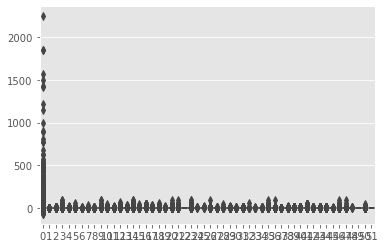

In [38]:
#robust scaler best for variance and KMeans - lets try it instead
#https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
rscaler = RobustScaler()
fmm = rscaler.fit_transform(features)
fmX = pd.DataFrame(fmm)

ax = sns.boxplot(data=fmX)
ax

<AxesSubplot:>

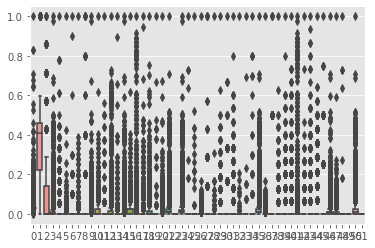

In [39]:
#min max scalar
min_max_scaler = MinMaxScaler()
fm = min_max_scaler.fit_transform(features)
fX = pd.DataFrame(fm)

ax1 = sns.boxplot(data=fX)
ax1

<AxesSubplot:>

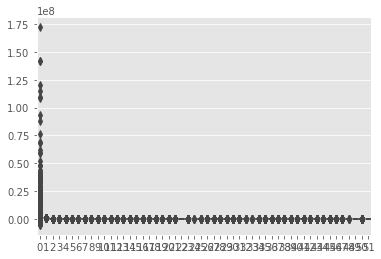

In [40]:
#no scaling at all - Looks so much like the RobustScalar data plot!
ax2 = sns.boxplot(data=features)
ax2

## Unsupervised Machine Learning with *Clustering*
Clustering can label the unlabeled Contract Data.

Below is a summary of the parameters used by the clustering algorithms from scikit-learn:

* K-Means: number of clusters

Read more about [Clustering with Scikit-Learn](http://scikit-learn.org/stable/modules/clustering.html#clustering).

**Start with K-means since it's simple.**  
Read more about [**K-Means**](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).  
The parameter that K-Means utilizes is the number of clusters or k.

Pick a number of clusters or k for K-Means, and check its performance by using the [silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), the metric that assesses the variance of objects within clusters. *Score closer to 1 is best.*

In [41]:
fmX.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.193266,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,-0.186939,-1.549670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295990,0.206700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,0.0,-0.5,0.0
3,3.375682,-0.626561,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.266011,-1.549670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.5,0.0


In [42]:
start = datetime.now()
k = 7
cluster = KMeans(init='k-means++', n_clusters=k, n_init=12)
cluster.fit(features)
sscore = metrics.silhouette_score(features, cluster.labels_)
end = datetime.now()
print(k, sscore, start, end)
#Unsummarized Data Scores
# 4 @ 0.9617675504696487, 6 @ 0.95, 8 @ 0.9069364059648168
#10, 2022-05-18 07:57:29.982479, 2022-05-18 08:46:01.014783, 0.8918228041435732

#Summarized Data Scores

7 0.9145946245565387 2022-06-20 10:33:29.360350 2022-06-20 10:33:31.140593


In [27]:
#Look at the scores on the scaled data with times
start = datetime.now()
k = 7
cluster = KMeans(init='k-means++', n_clusters=k, n_init=12)
cluster.fit(fmm)
sscore = metrics.silhouette_score(fmm, cluster.labels_)
end = datetime.now()

print(k, sscore, start, end)

#5 0.9274784734703179 2022-06-02 23:41:55.327339 2022-06-03 06:35:42.584375   very good
#6 0.9279852408880843 2022-06-03 10:25:17.954990 2022-06-03 11:14:51.962777   best
#7 0.9151451138701648 2022-06-03 11:22:45.191296 2022-06-03 12:12:26.871730   drop off here
#10 0.8463196941092108 2022-06-03 06:40:31.236361 2022-06-03 07:29:26.914001  weak
#15 0.7899714533314375 2022-06-03 07:58:33.748503 2022-06-03 08:51:54.866970  weakest

7 0.8799701721598675 2022-06-20 10:30:47.572540 2022-06-20 10:30:49.276976


In [43]:
#Look at the scores on the unscaled data with times minibatch
start = datetime.now()
k = 10
cluster = MiniBatchKMeans(init='k-means++', n_clusters=k, n_init=10,max_no_improvement=10, verbose=0
                          ,random_state=0,batch_size = 200000)
cluster.fit(fmm)
sscore = metrics.silhouette_score(fmm, cluster.labels_)
end = datetime.now()

print(k, sscore, start, end)

10 0.021388853354633877 2022-06-20 10:33:35.349402 2022-06-20 10:33:37.681190


**Model selection** can be done by looping through a range of k.
This could also include looping through different types of clustering methods that uses k or number of clusters as a parameter. 

The loop includes K-Means and the following clustering methods:  

* [**MiniBatch K-Means**](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) is the same as K-means but uses mini-batches to reduce computation time 

*Pick a range of k to explore.*

In [44]:
from sklearn.preprocessing import normalize
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_norm = normalize(fmX)
  
# Converting the numpy array into a pandas DataFrame
df_X_normalized = pd.DataFrame(X_norm)

In [49]:
# adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

range_n_clusters = range(4,6)
List1 = []
List2 = []
List3 = []


 
for n_clusters in range_n_clusters:
    def bench_clustering(estimator, name, data):
        estimator.fit(data)
        v1 = name 
        v2 = n_clusters
        v3 = metrics.silhouette_score(data, estimator.labels_)

        List1.append(v1)
        List2.append(v2)
        List3.append(v3)
        print('End ',v1,': ', datetime.now())
    
    #print('Start MinbatchKMeans:', datetime.now())
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        bench_clustering(MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, n_init=12,max_no_improvement=10, verbose=0,random_state=0),
                     name="MiniBatchKMeans", data=fmm)
        bench_clustering(AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
                  name="Ward", data=fmm)   

        bench_clustering(AgglomerativeClustering(n_clusters=n_clusters, linkage='average'),
                  name="Average", data=fmm)  
    
        bench_clustering(AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
                 name="Complete", data=fmm) 

d = pd.DataFrame()
d['method'] = List1 
d['k'] = List2
d['silhouette_score'] = List3
d = d.sort_values(['silhouette_score'], ascending = False)
print (d)

End  MiniBatchKMeans :  2022-06-20 10:40:58.058418
End  Ward :  2022-06-20 10:41:04.105234
End  Average :  2022-06-20 10:41:09.976550
End  Complete :  2022-06-20 10:41:15.984474
End  MiniBatchKMeans :  2022-06-20 10:41:18.415967
End  Ward :  2022-06-20 10:41:24.448840
End  Average :  2022-06-20 10:41:30.103679
End  Complete :  2022-06-20 10:41:36.101627
            method  k  silhouette_score
2          Average  4          0.972702
6          Average  5          0.967383
1             Ward  4          0.935294
3         Complete  4          0.935294
5             Ward  5          0.823666
7         Complete  5          0.823666
4  MiniBatchKMeans  5          0.430980
0  MiniBatchKMeans  4          0.136604


[**Silhouette plot analysis**](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) can also aid with model selection. The relationship of objects within each cluster can be assessed visually.  

*Pick a range of k to explore.* (Below is used with K-Means, but can be used with the other clustering methods that use k as a parameter, as mentioned above.)

For n_clusters = 4 The average silhouette_score is : 0.9581905664481426


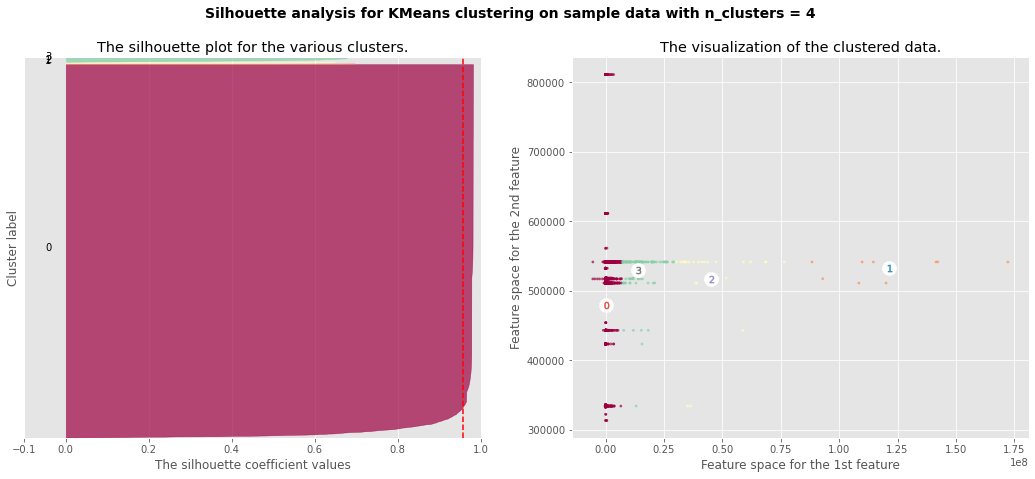

For n_clusters = 5 The average silhouette_score is : 0.9519950968656521


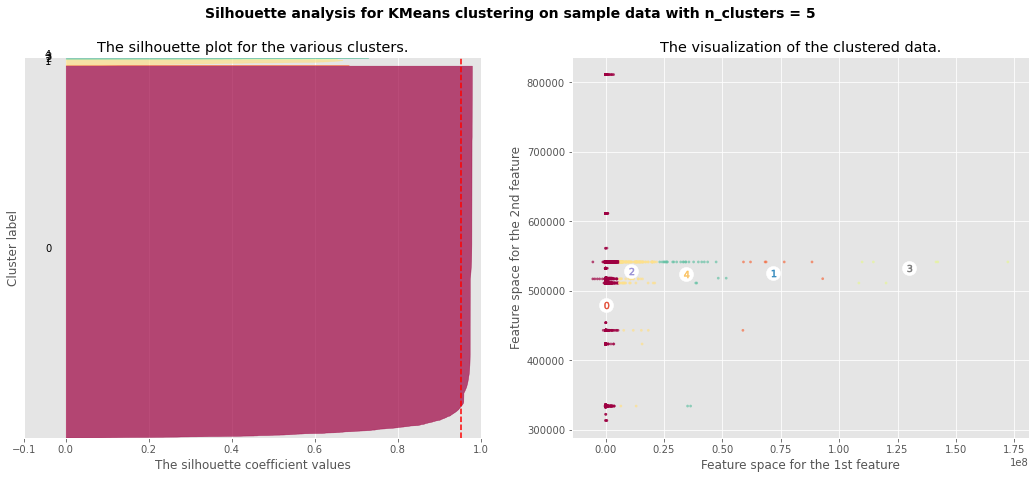

For n_clusters = 6 The average silhouette_score is : 0.9146213644639613


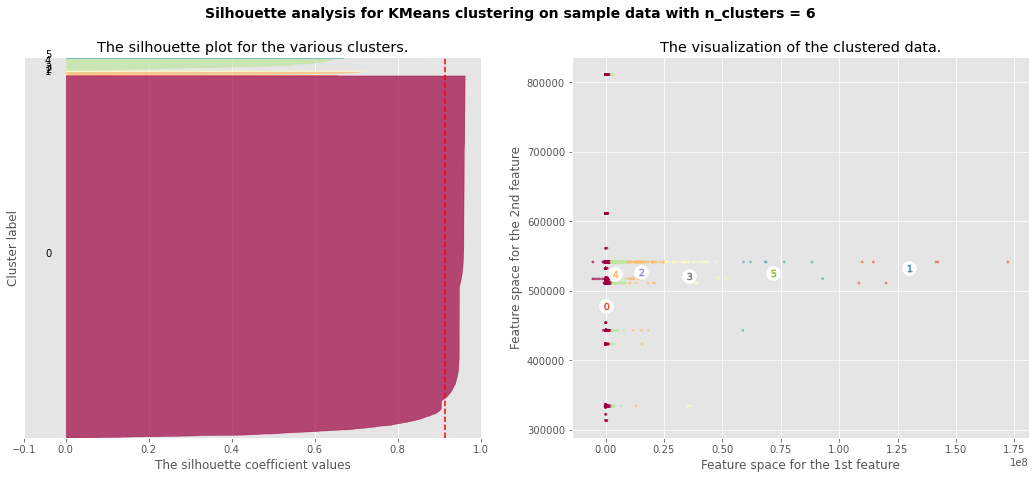

In [53]:
#adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
#MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, n_init=12,max_no_improvement=10, verbose=0,random_state=0)
#

range_n_clusters = range(4,7)

for n_clusters in range_n_clusters:
    
    cluster = KMeans(init='k-means++', n_clusters=n_clusters, n_init=12)
    #cluster = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, n_init=12,max_no_improvement=10
    #                          ,verbose=0,random_state=0,batch_size=5000)
    cluster.fit(features)
    metrics.silhouette_score(features, cluster.labels_)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster
    cluster_labels = clusterer.fit_predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("Spectral")
        #colors = cmap(a / b)

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features[:, 0], features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**Visualizing Clusters** - 
The example below shows the clusters and their centroids.
Seeing the shape of the clusters and the location of the centroids can help with further analysis.

*Pick a k to explore.* (Below is used with K-Means, but can be used with the other clustering methods that use k as a parameter, as mentioned above.)


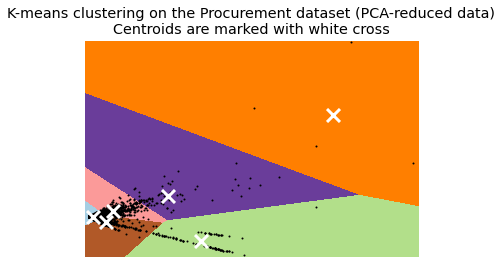

In [55]:
#adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

n_clusters = 6
f_scaled = scale(features)
reduced_data = PCA(n_components=2).fit_transform(f_scaled)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Procurement dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
